# Temps d'attente entre 2 accidents d'avions

Le site https://www.kaggle.com met à disposition l'ensemble des accidents d'avion connus de 1908 à 2009.

Après nettoyage des données, nous obtenons le fichier 'avions_crash.csv'.

Chaque ligne correspond à l'accident d'un avion, on a :
- La date
- L'année
- Le lieu
- Le propriétaire
- Le type
- Le nom du trajet
- Le nombre de passagers à bord
- Le nombre de victimes

Les objectifs sont :

- Pour la période allant de 2005 à 2007, calculer les temps d'attente, comptés en jour, entre deux accidents consécuitfs d'avion.
- Modéliser ce temps d'attente par une variable aléatoire notée X pour laquelle on proposera une loi de probabilité.
- Selon cette loi, calculer la probabilité d'attendre au moins 30 jours pour voir survenir un nouvel accident.
- S'intéresser au cas où 2 accidents se produisent le même jour

## Etape 1 : Temps d'attente entre deux crashs d'avion

In [2]:
import pandas as pd
import pylab as pl
pl.style.use('bmh')

T = pd.read_csv('data/avions_crash.csv')
T.head()

,Date,Year,Operator,Type,Route,Aboard,Fatalities
0,1908-09-17 17:18:00,1908,MILITARY - U.S. ARMY,Wright Flyer III,Demonstration,2.0,1.0
1,1912-07-12 06:30:00,1912,MILITARY - U.S. NAVY,Dirigible,Test flight,5.0,5.0
2,1913-08-06 00:00:00,1913,PRIVATE,Curtiss seaplane,NaN,1.0,1.0
3,1913-09-09 18:30:00,1913,MILITARY - GERMAN NAVY,Zeppelin L-1 (airship),NaN,20.0,14.0
4,1913-10-17 10:30:00,1913,MILITARY - GERMAN NAVY,Zeppelin L-2 (airship),NaN,30.0,30.0


In [3]:
T['Date'] = pd.to_datetime(T['Date'])

T['Delta'] = T['Date'].diff()
T.head()

,Date,Year,Operator,Type,Route,Aboard,Fatalities,Delta
0,1908-09-17 17:18:00,1908,MILITARY - U.S. ARMY,Wright Flyer III,Demonstration,2.0,1.0,NaT
1,1912-07-12 06:30:00,1912,MILITARY - U.S. NAVY,Dirigible,Test flight,5.0,5.0,1393 days 13:12:00
2,1913-08-06 00:00:00,1913,PRIVATE,Curtiss seaplane,NaN,1.0,1.0,389 days 17:30:00
3,1913-09-09 18:30:00,1913,MILITARY - GERMAN NAVY,Zeppelin L-1 (airship),NaN,20.0,14.0,34 days 18:30:00
4,1913-10-17 10:30:00,1913,MILITARY - GERMAN NAVY,Zeppelin L-2 (airship),NaN,30.0,30.0,37 days 16:00:00


On voit qu'il y a eu 1393 jours d'attente entre les 2 premiers crashs d'avions

In [4]:
S = T.query('Year in [2005, 2006, 2007]')
S #Représente les crashs ayant eu lieu entre 2005 et 2007

,Date,Year,Operator,Type,Route,Aboard,Fatalities,Delta
5028,2005-01-13 05:20:00,2005,MILITARY - COLOMBIAN GOVERNMENT,Black Hawk helicopter,NaN,20.0,20.0,32 days 23:50:00
5029,2005-01-13 13:20:00,2005,TURA AIR ENTERPRISE,Antonov AN-2,Vanavara - Tura,9.0,9.0,0 days 08:00:00
5030,2005-01-13 22:18:00,2005,AIRNOW,Embraer EMB-110 Bandeirante,"Bangor, ME - Concord, NH",1.0,1.0,0 days 08:58:00
5031,2005-01-26 01:20:00,2005,MILITARY - U.S. MARINES,CH53E Sea Stallion,Ferrying troops,31.0,31.0,12 days 03:02:00
5032,2005-01-27 08:10:00,2005,FARNAIR HUNGARY,Let 410UVP-E4,Bucharest -Lasi,2.0,2.0,1 days 06:50:00
...,...,...,...,...,...,...,...,...
5177,2007-11-08 08:00:00,2007,JUBA AIR CARGO,Antonov 12,Khartoum - Juba,4.0,0.0,3 days 17:50:00
5178,2007-11-30 01:36:00,2007,ATLASJET AIRLINES,McDonnell Douglas MD-83,Istanbul - Isparta,57.0,57.0,21 days 17:36:00
5179,2007-12-03 17:18:00,2007,"EVERGREEN ALASKA HELICOPTERS, INC.",Eurocopter Deutschland BK117C1,Cordova - Ancorage,4.0,4.0,3 days 15:42:00
5180,2007-12-05 06:48:00,2007,CASTLE AVIATION,Cessna 208B Caravan I Super Cargomaster,"Columbus, OH - Buffalo, NY",2.0,2.0,1 days 13:30:00


Il y a eu 154 accidents entre 2005 et 2007

In [5]:
D = S['Delta'].dt.days + S['Delta'].dt.seconds / (24*3600)
D

5028    32.993056
5029     0.333333
5030     0.373611
5031    12.126389
5032     1.284722
          ...    
5177     3.743056
5178    21.733333
5179     3.654167
5180     1.562500
5181     4.425000
Name: Delta, Length: 154, dtype: float64

## Etape 2 : Modélisation du temps d'attente 

Le temps d'attente entre deux accidents consécutifs (survenus de 2005 à 2007) est modélise par la variable aléatoire X. La colonne D contient des valeurs prises par X.

#### Histogramme des fréquences du temps d'attente

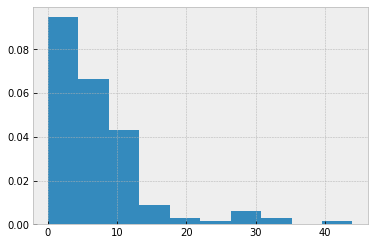

In [6]:
pl.hist(D, density=True)
pl.show()

#### Ajustement de l'histogramme

In [7]:
from math import exp
from ipywidgets import interact

On suppose que X suive une loi exponentielle de paramètre 'alpha'
Sa densité = 'alpha'* exp(-'alpha'* x)

In [8]:
def densite(x, a):
    f = a*exp(-a*x)
    return f

In [9]:
def plot(a):
    pl.hist(D, density=True, color='white', edgecolor = 'black')
    X = [k/10 for k in range(501)]
    Y = [densite(x,a) for x in X]
    pl.plot(X, Y, color='red')

In [10]:
interact(plot, a=(0,0.16, 0.01))

interactive(children=(FloatSlider(value=0.08, description='a', max=0.16, step=0.01), Output()), _dom_classes=(…

<function __main__.plot(a)>

On choisit a entre 0.13 et 0.16

#### Une proposition pour calculer a

In [11]:
print("La moyenne des temps d'attentes est", D.mean())
m = D.mean()

La moyenne des temps d'attentes est 7.100514069264069


Selon la loi normale, E[T] = m

Or pour la loi expo, E[T] = 1/a

Donc si m = 1/a, on a :

In [12]:
print('a =', 1/m)
a = 1/m

a = 0.14083487339722217


#### Calculs de probabilité selon cette loi

P(T>=30) = 1-P(T<=30) = exp(-30*a)

In [13]:
print("La probabilité qu'il y ait plus de 30 jours entre 2 crash est", exp(-30*a))

La probabilité qu'il y ait plus de 30 jours entre 2 crash est 0.014624659006708264


P(T<=1) = 1 - exp(-a)

In [14]:
print("La probabilité que 2 crashs se passent le même jour est", 1-exp(-a))

La probabilité que 2 crashs se passent le même jour est 0.13136726577163083


## Etape 3 : Nombre de temps d'attente inférieurs à 24h

In [15]:
D <= 1

5028    False
5029     True
5030     True
5031    False
5032    False
        ...  
5177    False
5178    False
5179    False
5180    False
5181    False
Name: Delta, Length: 154, dtype: bool

Celà nous renvoie si le temps d'attente entre 2 crashs est inférieur à 1 jour

In [16]:
list(D<1).count(True)

15

Il y a eu 15 temps d'attente inférieur à 24h.

## Etape 4 : Vraisemblance d'obtenir au moins 15 temps d'attente inférieur à 24h

Modèle : Un crash d'avion s'est produit
- A chaque heure qui suit, il se produit un nouveau crash ou non.
- On fait l'hypothèse qu'il ne se produira pas deux crashs durant la même heure.

On note X le temps d'attente, compté en heure, avant le prochain crash d'avion.

In [25]:
p = 154/(365*3*24)
print("La probabilité que deux crashs aient lieu en moins d'une heure est", p)

La probabilité que deux crashs aient lieu en moins d'une heure est 0.005859969558599696


#### Simulation de X

In [26]:
from random import random

In [27]:
def temps():
    h = 1
    while random() > p:
        h=h+1
    return h

#### Loi de probabilité de X

X suit une loi de Bernouilli de paramètre p (~0.006)

P(X<=24) = SOMME(P(X=k)) pour k allant de 1 à 24

= SOMME(p*q^k-1) pour k allant de 1 à 24 et q = 1-p

= p*SOMME(q^k-1)

= p*(1-q^24)/(1-q) or 1-q = p

= 1-q^24

In [35]:
q = 1-p
1-q**24

0.13155667988918907

In [50]:
def echan():
    n = 0
    for k in range(154):
        if temps() <= 24:
            n = n+1
    return n

On simule 10000 séries de 154 réalisations de X

In [52]:
def vraisemblance():
    n = 0
    for k in range(10000):
        if echan()>15:
            n=n+1
    return n/10000

In [53]:
vraisemblance()

0.8724

On a environ 87% de chance d'observe au moins 15 temps d'attente inférieurs à 24h sur une série de 154 donc l'évènement a de fortes chances de se passer.